# Strojové učení v hmotnostní spektrometrii
## Cesta tam a zase zpátky
### Aleš Křenek, Filip Jozefov, Adam Hájek

# Hra na MS

## Referenční data (2 týmy)
- "ionizace" -- rozložení zvířátka na 3-8 částí
  - částečně respektujte, jak se rozpadá samo, ale ne vždy stejně, občas užijte mírné násilí
- "měření spektra"
  - hmotnosti fragmentů určete podle klíče na dalším slajdu
  - u každé unikátní hmotnosti spočtěte počet výskytů 
  - nadiktujte mi seznam dvojic [_hmotnost, počet fragmentů_]
  
## Experimentální data
- dtto, udělal jsem za vás, abyste tak snadno nepoznali, co bylo na vstupu

## Příklady hmotností
<table> 
    <tr>
        <td><img src="23.jpeg" width="300"/></td><td>0.67&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
        <td><img src="1.jpeg" width="300"/></td><td>1.00&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
        <td><img src="2.jpeg" width="300"/></td><td>2.00</td>
    </tr>
    <tr>
        <td><img src="123.jpeg" width="300"/></td><td>1.67&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
        <td><img src="3.jpeg" width="300"/></td><td>3.00&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
        <td><img src="523.jpeg" width="300"/></td><td>5.67</td>
    </tr>
</table>

## Referenční data

In [47]:
import numpy as np
zelva_ = np.array([ [1.0, 21], [1.67,2], [ 2.0,3], [3.0,2], [4.0,2], [4.67,2],
                  [5.67,1], [6.0,2], [7.0,1], [7.67,1], [8.0,1], [10.0,1]])
pes_ = np.array([ [ 0.67, 2 ], [1.0, 5], [2.0, 7], [2.67, 2], [3.0, 1],
                 [3.67, 1], [4.0, 4], [4.67, 8], [5.0,2], [5.67,3], [6.0, 1], [6.67, 2]])

In [48]:
import matchms as ms
zelva = ms.Spectrum(mz=zelva_[:,0]*10.,intensities=zelva_[:,1],metadata={ 'Compound Name':'želva','precursor_mz':'100'})
pes = ms.Spectrum(mz=pes_[:,0]*10.,intensities=pes_[:,1],metadata={'Compound Name':'pes', 'precursor_mz':'100'})

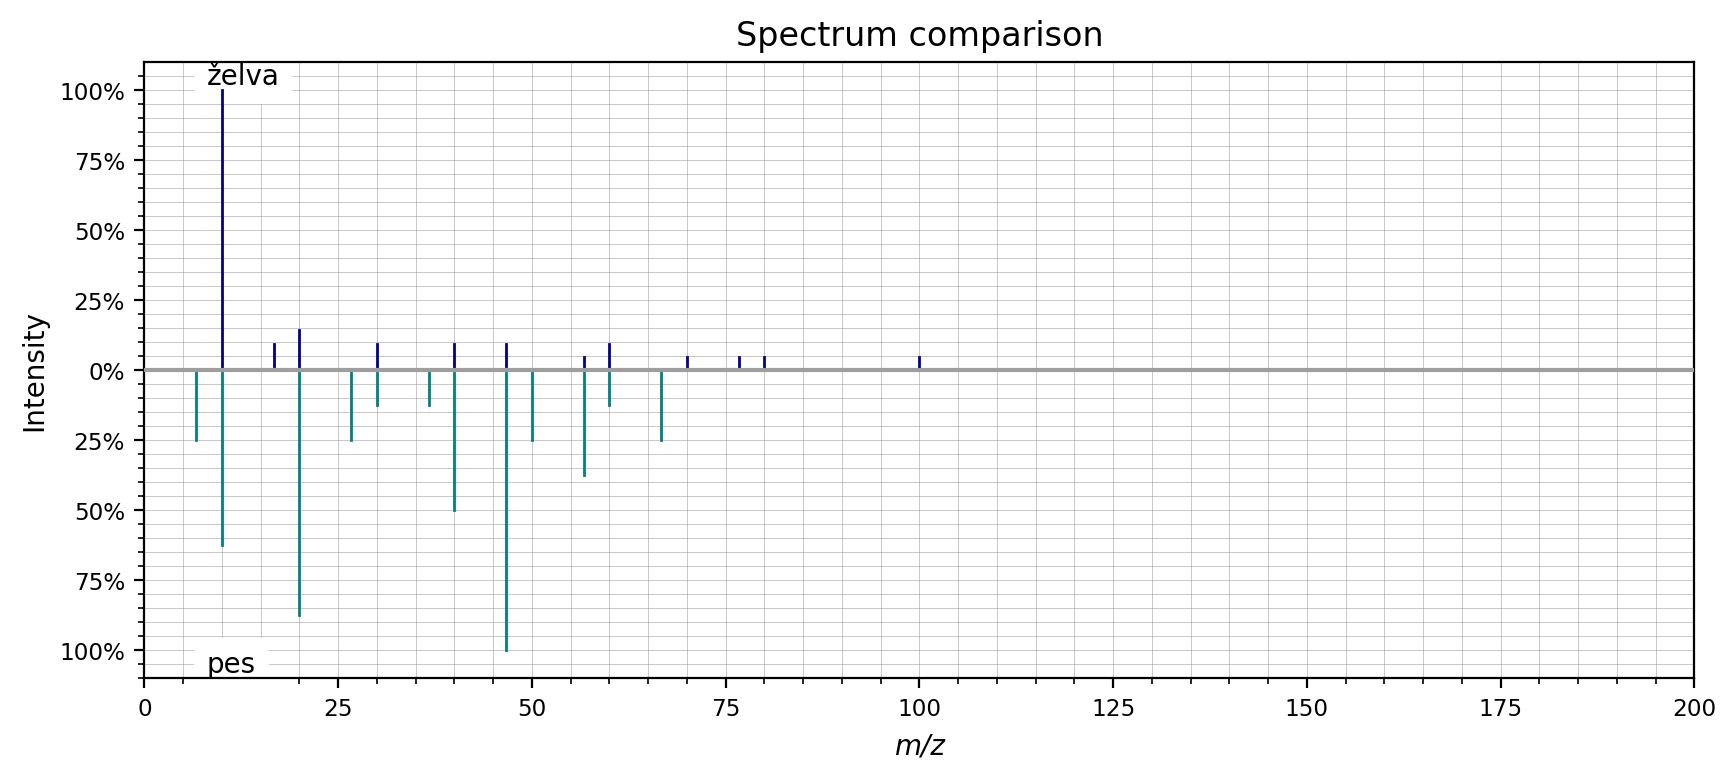

In [50]:
import matplotlib.pyplot as plt
zelva.plot_against(pes,figsize=(10,4))
plt.show()

## Experimentální data

In [51]:
pokus1_ = np.array([ [0.67,3], [1.0,7], [3.67,1], [4.0,8], [4.67,5], 
                    [5.0,1], [5.67,1], [6.67,8]])
pokus2_ = np.array([ [0.67,1], [1.0,18], [2.0,5], [3.0,3], [4.0,3],[4.67,1],
                   [5.0,1], [6.0,1], [6.67,1], [7.67,2], [8.0,1], [8.67,1]])
pokus1 = ms.Spectrum(mz=pokus1_[:,0]*10.,intensities=pokus1_[:,1],metadata={ 'Compound Name':'Pokus 1','precursor_mz':'100'})
pokus2 = ms.Spectrum(mz=pokus2_[:,0]*10.,intensities=pokus2_[:,1],metadata={'Compound Name':'Pokus 2','precursor_mz':'100'})

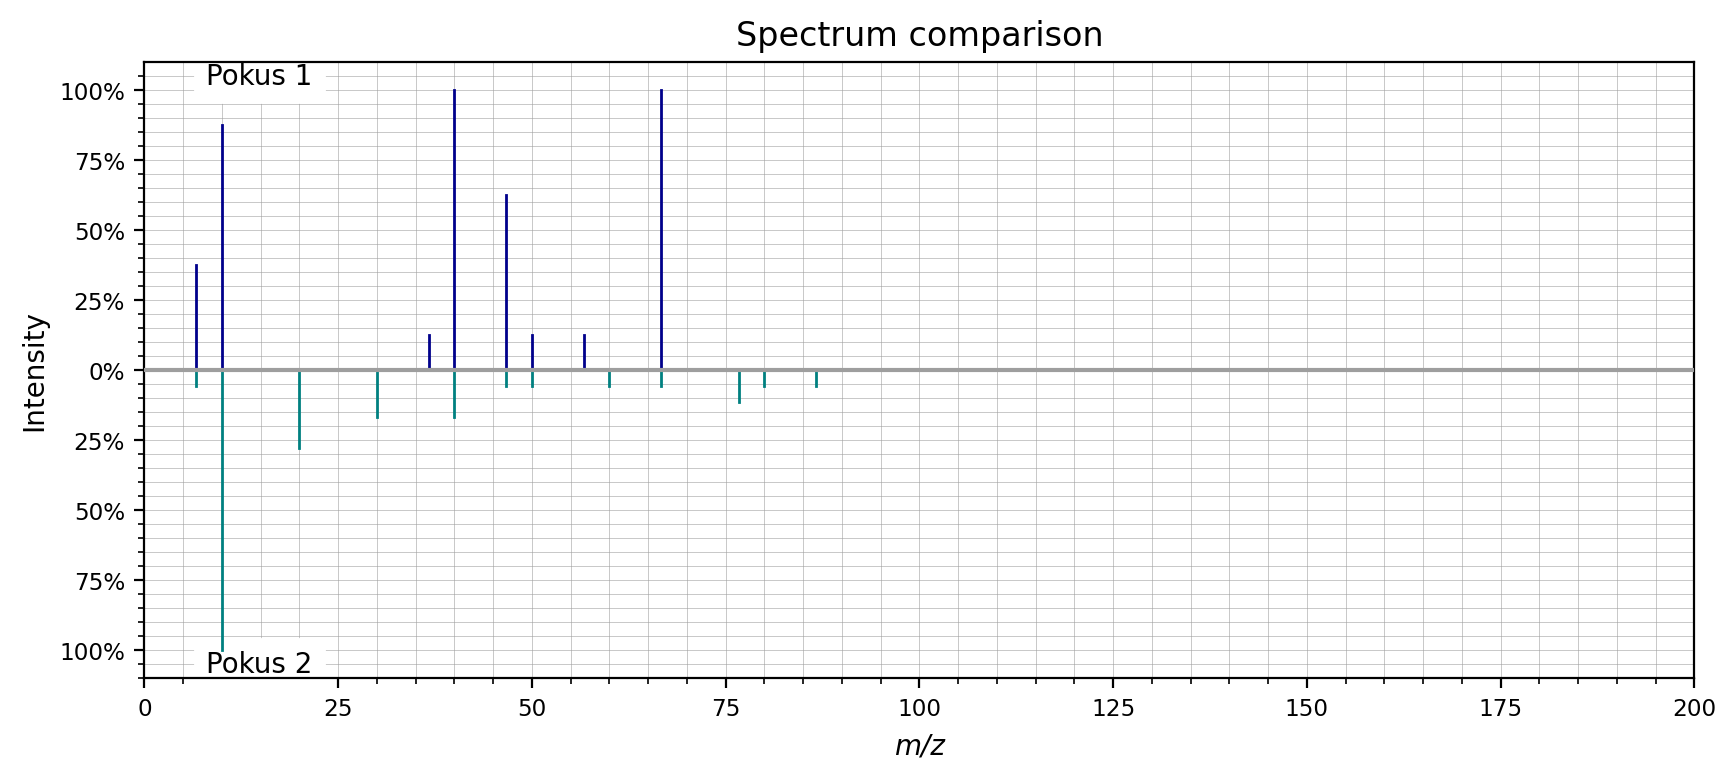

In [52]:
pokus1.plot_against(pokus2,figsize=(10,4))
plt.show()

## Kouknu a vidím

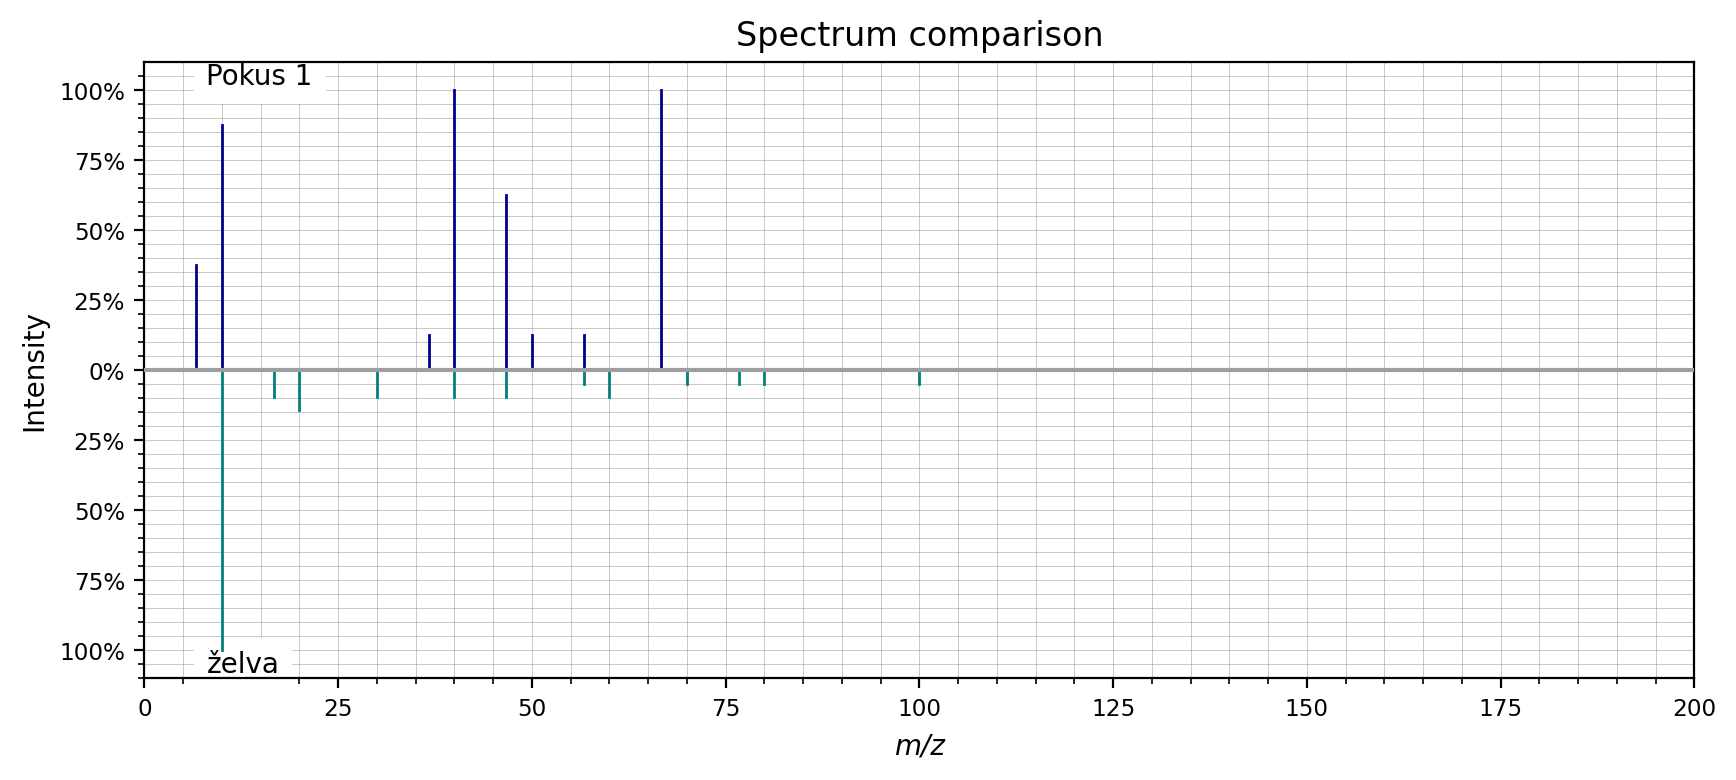

In [54]:
pokus1.plot_against(zelva,figsize=(10,4))
plt.show()

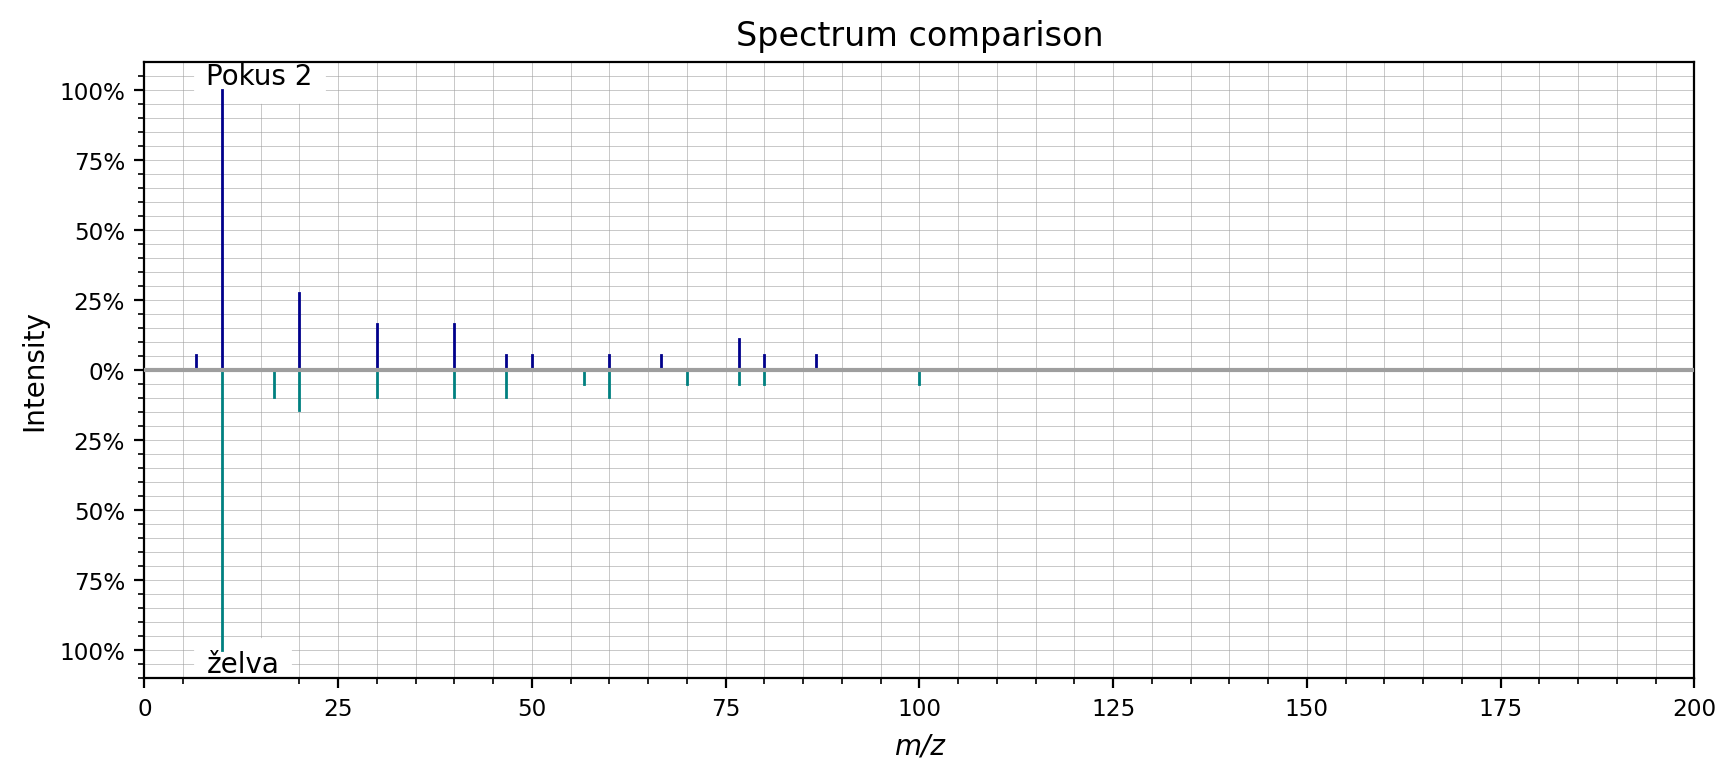

In [55]:
pokus2.plot_against(zelva,figsize=(10,4))
plt.show()

## Zobecněný skalární součin

$$ \textit{DP}_{a,b}(S_p,S_r) = \frac{\sum_k (m_k^aI_{pk}^b \; m_k^a I_{rk}^b)}{\sqrt{\sum_k (m_k^a I_{pk}^b)^2 \sum_k (m_k^a I_{rk}^b)^2 } }$$

- skalární součin intenzit na stejných hodnotách $m$ (rozsah indexu $k$)
- špičky bez protikusu ve druhém spektru se ignorují
- váženo hmotností $m$ a modifikováno exponenty $a,b$
- normalizace součiny sama se sebou

In [56]:
# regular dot product
dp = ms.similarity.ModifiedCosine(mz_power=1.,intensity_power=.5)

# Stein dot product
sdp = ms.similarity.ModifiedCosine(mz_power=3.,intensity_power=.6)

In [73]:
import pandas as pd
pd.DataFrame(np.vectorize(lambda x: x[0])(dp.matrix(references=[zelva,pes],queries=[pokus1,pokus2])),
                index=['zelva','pes'], columns=['pokus1','pokus2'])

,pokus1,pokus2
zelva,0.303316,0.646565
pes,0.829269,0.559601


In [74]:
pd.DataFrame(np.vectorize(lambda x: x[0])(sdp.matrix(references=[zelva,pes],queries=[pokus1,pokus2])),
                index=['zelva','pes'], columns=['pokus1','pokus2'])

,pokus1,pokus2
zelva,0.065104,0.438502
pes,0.818457,0.300636


# MS doopravdy

## Typická zadání
- Postupy aplikujeme na molekuly (v našem případě tzv. "malé")
- Dostanu vzorek neznámého složení
- A) Obsahuje nějakou konkrétní sloučeninu (např. stopy výbušnin při letištní kontrole)?
- B) Co všechno ve vzorku bylo?

## Fáze analýzy
- chromatografická separace 
  - plynová či kapalinová, komplexní reakce molekul vzorku s rozpouštědlem a kolonou
- ionizace složek a měření hmotnostního spektra
  - pohyb nabitých částic v elektrickém poli, doba letu, rezonance, ...
- výpočetní zpracování získaných dat
  - odstranění šumu, dekonvoluce, korekce artefaktů měření, ... 
- určení jednotlivých složek z izolovaných spekter
  - porovnání s databázemi

_Spousta zajímavé fyziky, matematiky a programování, zájemcům popovídáme u večeře_

# A kde je to strojové učení?

## Chemický prostor vs. spektrální databáze 

- 350 000 položek v databázi NIST EI-MS (známá spektra)

- téměř $10^9$ položek v databázi ZINC (když zaplatím, někdo mi to uvaří)

- odhadovaných $10^{60}$ možných malých molekul

## Dopředné modely (Filip)
- ze vzorce určit spektrum
- model je natrénovaný na experimentální databázi (NIST)
- např. množina (i rozsáhlá) "podezřelých" sloučenin, jejichž spektra neznám; srovnávám generovaná spektra s experimentem
- generování trénovací sady pro zpětné modely

## Zpětné modely (Adam)
- z naměřeného spektra chci přímo určit vzorec
- model je výrazně větší, je třeba trénovat na mnohem větší sadě než NIST
- plnohodnotná necílená analýza

# Cesta tam a zase zpátky

<table>
    <tr>
        <td><img src='thc-formula.png' width='500'/></td>
        <td>$\leftrightarrow$</td>
        <td><img src='thc-spec.png' width='500'/></td>
    </tr>
</table>
 